# Airbnb-Data-Science-Project-listing-Seattle for Uadacity nano Degree

# Section 1 :- Business Understanding
### The provided code addresses several questions related to analyzing Airbnb listing data for properties in Seattle. Let's break down the business understanding based on each question:

# Question-1: Most Common Amenities
####  Understanding the most common amenities helps Airbnb hosts to prioritize what features to offer in their listings. By knowing which amenities are in high demand, hosts can attract more guests and potentially increase booking rates.

# Question-2: Factors Attracting Guests
#### This question delves into what factors influence guests the most when choosing a property to rent. By analyzing booking ratios based on room type, property type, and amenities, hosts can gain insights into what features are most appealing to guests. This information can guide hosts in optimizing their listings to attract more bookings.

# Question-3: Estimating Listing Price
#### The objective here is to build a model to estimate the price of a listing based on various features. Understanding the factors that influence listing prices can help hosts set competitive prices for their properties. By knowing which features have the most significant impact on pricing, hosts can adjust their offerings strategically to maximize profitability.

# Question-4: Proximity to Downtown
#### Analyzing the effect of a listing's proximity to downtown on its price provides valuable insights for both hosts and guests. Hosts can understand how location impacts pricing and adjust their pricing strategies accordingly. Guests can use this information to make informed decisions based on their preferences for proximity to downtown areas.

# Section 2 :- Data Understanding: Loading and examining the dataset

In [51]:
# Section 2 :- Data Understanding: Loading and examining the datasetimport numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from collections import defaultdict
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import math
%matplotlib inline

df_lis = pd.read_csv('listings.csv')

# Prepare Data

### First I would like to know about the dimentions of each dataset.

In [52]:
#Below code gives information about the number of columns and number of rows.
print(df_lis.shape)

(3585, 95)


### The listings show each house's informations so I would like to know more about this dataset, starting with the column names and data types of each house.

In [53]:
#Below code show the data types and the number of these data types in the dataset
df_lis.dtypes.value_counts()

object     62
float64    18
int64      15
dtype: int64

In [54]:
#Below code show the name of the columns which are float64 data type
df_lis.dtypes[df_lis.dtypes=='float64']

neighbourhood_group_cleansed    float64
latitude                        float64
longitude                       float64
bathrooms                       float64
bedrooms                        float64
beds                            float64
square_feet                     float64
has_availability                float64
review_scores_rating            float64
review_scores_accuracy          float64
review_scores_cleanliness       float64
review_scores_checkin           float64
review_scores_communication     float64
review_scores_location          float64
review_scores_value             float64
license                         float64
jurisdiction_names              float64
reviews_per_month               float64
dtype: object

In [55]:
#Below code show the name of the columns which are int64 data type
df_lis.dtypes[df_lis.dtypes=='int64']

id                                int64
scrape_id                         int64
host_id                           int64
host_listings_count               int64
host_total_listings_count         int64
accommodates                      int64
guests_included                   int64
minimum_nights                    int64
maximum_nights                    int64
availability_30                   int64
availability_60                   int64
availability_90                   int64
availability_365                  int64
number_of_reviews                 int64
calculated_host_listings_count    int64
dtype: object

In [56]:
#Below code show the name of the columns which are object data type
pd.set_option('display.max_rows', 92)
df_lis.dtypes[df_lis.dtypes=='object']

listing_url                         object
last_scraped                        object
name                                object
summary                             object
space                               object
description                         object
experiences_offered                 object
neighborhood_overview               object
notes                               object
transit                             object
access                              object
interaction                         object
house_rules                         object
thumbnail_url                       object
medium_url                          object
picture_url                         object
xl_picture_url                      object
host_url                            object
host_name                           object
host_since                          object
host_location                       object
host_about                          object
host_response_time                  object
host_respon

There are many columns that are considered as object, yet some of they should be treated as integer or float (especially those price columns.) This is a type change problem that I will handle later. For now I would like to know about the number missing values and number of unique inputs in each column.

In [57]:
#Below code shows the number of missing values in each column in descending order
df_lis.isnull().sum().sort_values(ascending=False)

has_availability                3585
license                         3585
neighbourhood_group_cleansed    3585
jurisdiction_names              3585
square_feet                     3529
                                ... 
is_location_exact                  0
room_type                          0
accommodates                       0
bed_type                           0
country                            0
Length: 95, dtype: int64

In [58]:
#Below code shows the columns names that do not have any missing values and all values are unique (different from each other) 
df_lis.nunique()[df_lis.nunique()==len(df_lis)]

id             3585
listing_url    3585
picture_url    3585
latitude       3585
longitude      3585
dtype: int64

In [59]:
#Below code shows the columns names that have some missing values and number of unique values in that column
df_lis.nunique()[df_lis.nunique() != len(df_lis)].sort_values(ascending=False)

name                                3504
description                         3423
summary                             3113
amenities                           3092
xl_picture_url                      2986
medium_url                          2986
thumbnail_url                       2986
space                               2268
host_url                            2181
host_id                             2181
host_picture_url                    2174
host_thumbnail_url                  2174
house_rules                         1928
transit                             1859
access                              1762
neighborhood_overview               1728
interaction                         1617
host_name                           1334
host_since                          1281
notes                               1269
host_about                          1240
street                              1239
first_review                         975
reviews_per_month                    644
last_review     

## Question-1: Most common amenities

When I look into the dataset, I see **amenities** column which gives detailed information about features of the listing. I would like to know what are the most common amenities that are available in Seattle Airbnb dataset. So the question is: What are the most common amenities?

### The code in the below cell creates the list of amenties available.

In [60]:
#I first create an empty list to fill with amenities available.
list_of_amenities = []

#I create a for loop to append all amenities values from the dataset into the list.
for i in range(len(df_lis)):
    list_of_amenities.append(df_lis['amenities'][i])

    
#In the dataset, every listing has a list of amenities, so in order to take unique amenities from the whole dataset
#I use the below code. I use the "set" function to make the amenities unique and than convert the set into a list
#to remain consistency of data type.
list_of_amenities = list((s.strip('\'\{\}') for s in list_of_amenities))
list_of_amenities_string = ",".join(list_of_amenities)
list_of_amenities = list(set(list_of_amenities_string.split(",")))

#After execution the above lines in this cell, we have an empty string in the list of amenties.
#We have to remove that one from the list.
without_empty_list_of_amenities = []
for string in list_of_amenities:
    if (string != ""):
        without_empty_list_of_amenities.append(string)
list_of_amenities = without_empty_list_of_amenities

### The code in the below cell is taken from one of the Udacity lecture notes (named: HowToBreakIntoTheField.py).
### This function is used to count the number of listings that contains each amenity in the amenities list.

In [61]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of amenities
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the amenity is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

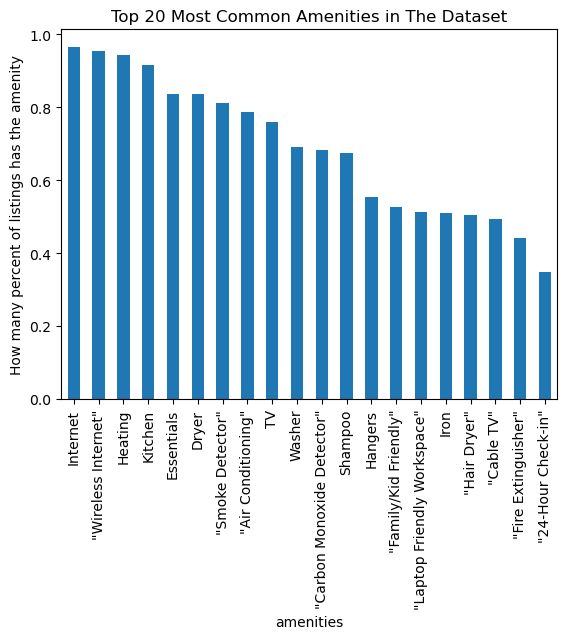

In [62]:
#I create a dataframe named study, which has lists of amenities as one column and the count of these amenities lists
#in our main (df_lis)
study = df_lis['amenities'].value_counts().reset_index()
study.rename(columns={'index': 'amenities', 'amenities': 'count'}, inplace=True)

#Here with the total_count function, I count the number of listings that contains each amenity in the amenities list.
study_df = total_count(study, 'amenities', 'count', list_of_amenities)
study_df.set_index('amenities', inplace=True)

#Here I create a bar chart to show the percentage of each amenity from the most common to the least common.
(study_df/len(df_lis))[:20].plot(kind='bar', legend=None);
plt.title('Top 20 Most Common Amenities in The Dataset');
plt.ylabel('How many percent of listings has the amenity')
plt.show()

### The analysis identified the most common amenities in Seattle Airbnb listings. By parsing the amenities column, the code extracted unique amenities and counted their occurrences across all listings. The top five most common amenities were identified as:
- Internet
- Wireless Internet
- Heating
- Smoke Detector
- Essentials



### Whereas the least common amenities in Seattle listings are:
- Lock on Bedroom Door
- Doorman
- Smoking Allowed
- Other pet(s)
- Washer / Dryer

## Question-2

When I look into the dataset, I see some important features of listigs. Some of these features have seperate columns (for example property_type or room_type) and some of these features are in **amenities** column. What I would like to know about this dataset is, "What attracts the guests most for renting a property?". I will try to answer this question below.

In order to understand the popularity of a listing I will use the **availability_30** column. Because it gives an idea about the booking ratio (or popularity) of the property.

## Calculate booking ratio for next 30 days

In [63]:
#Check if availability_30 column has an missing values. I will use this columns for booking_ratio_30.
df_lis['availability_30'].isnull().sum()

0

In [64]:
#Below code, creates the column 'booking_ratio_30' which gives info about the booking percentage in the next 30 days
df_lis['booking_ratio_30'] = 1 - (df_lis['availability_30']/30)

In [65]:
#Show the first five rows of the new column
df_lis['booking_ratio_30'].head()

0    1.000000
1    0.133333
2    0.366667
3    0.800000
4    0.566667
Name: booking_ratio_30, dtype: float64

###  Above, I found a percantage on booking ratio of each listing. Now I will have to make seperate columns for each of the features that I will investige whether they attract the guests for choosing the listing to rent.

#### First feature I would like to investigate is **room_type**.

In [66]:
#Below code checks if the 'room_type' column has any missing values.
#Since the result of the code is zero, the column does not have any missing values. 
df_lis['room_type'].isnull().sum()

0

In [67]:
#Below code shows the number of each unique values in the 'room_type' column.
df_lis['room_type'].value_counts().sort_values(ascending=False)

Entire home/apt    2127
Private room       1378
Shared room          80
Name: room_type, dtype: int64

### Above, I found that there is not any missing values in the room_type column and also there are three different types of rooms. How about these different rooms booking ratios?

## Analyze room type booking ratios

In [68]:
#Below code shows information about booking ratios of different room types for next 30 days
df_lis.groupby(['room_type'])['booking_ratio_30'].mean().sort_values(ascending=False)

room_type
Private room       0.739332
Entire home/apt    0.699091
Shared room        0.569583
Name: booking_ratio_30, dtype: float64

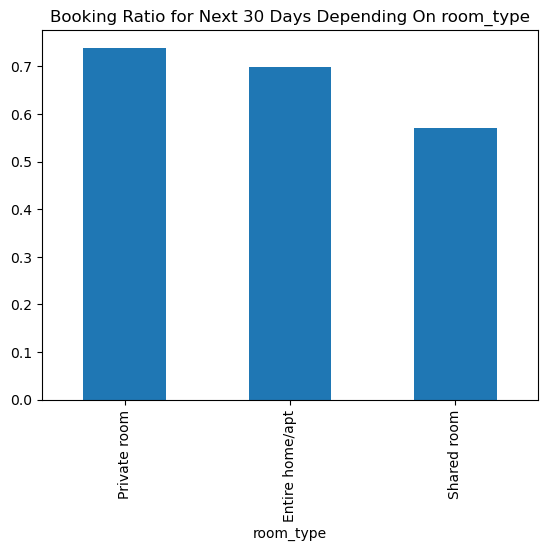

In [69]:
#Below code plots a bar chart to visualize booking ratios of different room types for next 30 days
(df_lis.groupby(['room_type'])['booking_ratio_30'].mean().sort_values(ascending=False)).plot(kind='bar', legend=None)
plt.title('Booking Ratio for Next 30 Days Depending On room_type');
plt.show()

## Analyze property type booking ratios

In [70]:
#Below code shows the unique property types and count of each one
df_lis['property_type'].value_counts().sort_values(ascending=False)

Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Guesthouse            1
Camper/RV             1
Name: property_type, dtype: int64

In [71]:
#Below code shows information about booking ratios of different property types for next 30 days
df_lis.groupby(['property_type'])['booking_ratio_30'].mean().sort_values(ascending=False)

property_type
Villa              0.950000
Camper/RV          0.866667
Dorm               0.816667
Loft               0.789744
Condominium        0.769120
Townhouse          0.722840
Apartment          0.713846
Bed & Breakfast    0.705691
Entire Floor       0.683333
House              0.682800
Guesthouse         0.600000
Other              0.576471
Boat               0.241667
Name: booking_ratio_30, dtype: float64

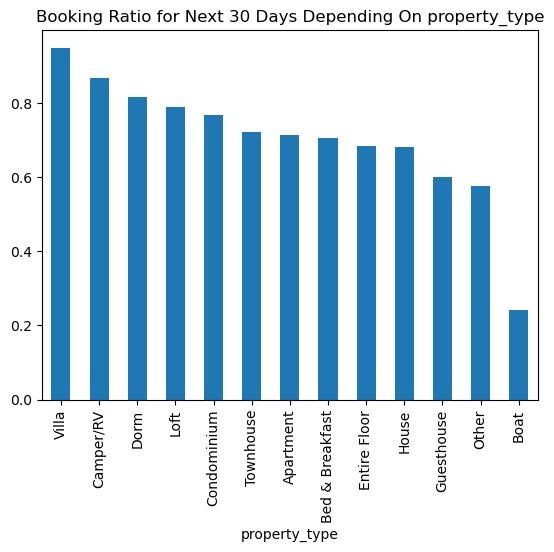

In [72]:
#Below code plots the booking ratios of different property types for next 30 days
(df_lis.groupby(['property_type'])['booking_ratio_30'].mean().sort_values(ascending=False)).plot(kind='bar', legend=None)
plt.title('Booking Ratio for Next 30 Days Depending On property_type');
plt.show()

### How about the **amenities** and their effect for attracting the guest? In order to answer the first question I had created the list of amenities which will be useful here to answer the second question.

In [73]:
#Check if amenities column has an missing values.
df_lis['amenities'].isnull().sum()

0

In [74]:
#Here I create new columns for each of the amenities and fill them all with zeros.
for i in range(len(list_of_amenities)):
    df_lis[list_of_amenities[i]] = 0

*"Below cell, takes about **3 minutes** to work on my machine."*

In [75]:
#Here I fill the new amenities columns, by first checking if the listing has that amenity.
#If the listing has that amenity I fill it with 1 and if it does not have it, I fill it with zero.
for i in range(len(list_of_amenities)):
    for t in range(len(df_lis)):
        if list_of_amenities[i] in df_lis['amenities'][t]:
            df_lis.loc[t , list_of_amenities[i]] = 1
        else:
            df_lis.loc[t , list_of_amenities[i]] = 0

In [76]:
#Here I create a dataframe that will contain information about booking ratio of listings that contain the amenity.
amenities_importance = pd.DataFrame(index=range(0,len(list_of_amenities)), columns = ["Amenity_Name", "Booking Ratio for HAVING the Amenity", "Booking Ratio for NOT HAVING the Amenity", "Booking Difference"])


#In the below for loop, I write the name of the amenity, calculate the booking ratio of listings that contain the amenitiy
#and calculate the booking ratio of listings that do not contain the amenitiy
#and calculate the difference between booking ratios for each amenity. 
for i in range(len(list_of_amenities)):
    amenities_importance['Amenity_Name'][i] = list_of_amenities[i]
    amenities_importance['Booking Ratio for HAVING the Amenity'][i] = df_lis.groupby([list_of_amenities[i]])['booking_ratio_30'].mean()[1]
    amenities_importance['Booking Ratio for NOT HAVING the Amenity'][i] = df_lis.groupby([list_of_amenities[i]])['booking_ratio_30'].mean()[0]
    amenities_importance['Booking Difference'][i] = amenities_importance['Booking Ratio for HAVING the Amenity'][i] - amenities_importance['Booking Ratio for NOT HAVING the Amenity'][i]

amenities_importance.set_index('Amenity_Name', inplace=True)

In [77]:
#Here I list the Top 10 booking difference to see which amenities are most prefered by guests.
amenities_importance.sort_values(by='Booking Difference', ascending = False)[:10]

,Booking Ratio for HAVING the Amenity,Booking Ratio for NOT HAVING the Amenity,Booking Difference
Amenity_Name,,,
"""Smoke Detector""",0.741028,0.584866,0.156162
"""translation missing: en.hosting_amenity_49""",0.777402,0.702377,0.075025
"""Buzzer/Wireless Intercom""",0.762376,0.696176,0.0662
"""Fire Extinguisher""",0.748335,0.682709,0.065626
"""Carbon Monoxide Detector""",0.731791,0.668679,0.063112
"""Wireless Internet""",0.714362,0.655488,0.058874
"""Hot Tub""",0.763872,0.709118,0.054754
"""Other pet(s)""",0.760417,0.71145,0.048966
"""Lock on Bedroom Door""",0.752602,0.705432,0.04717


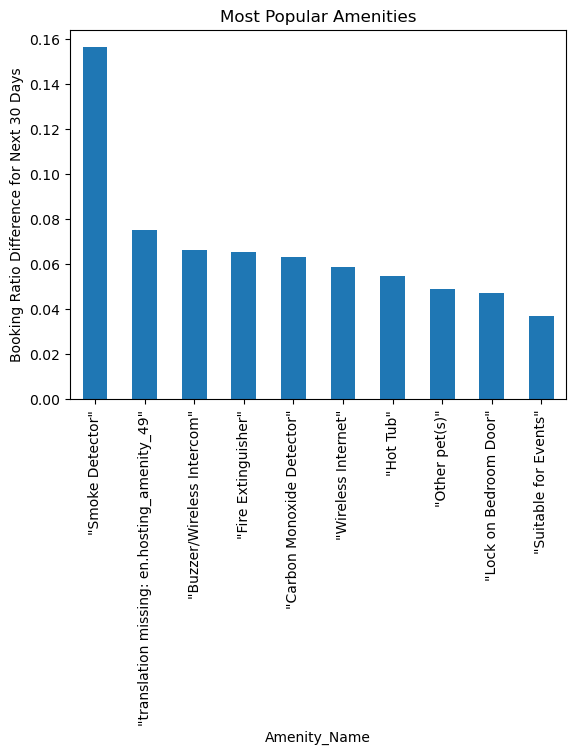

In [78]:
#Here I draw a bar chart to visualize which amenities are most prefered by guests.
amenities_importance['Booking Difference'].sort_values(ascending = False)[:10].plot(kind='bar', legend=None)
plt.title('Most Popular Amenities');
plt.ylabel('Booking Ratio Difference for Next 30 Days')
plt.show()

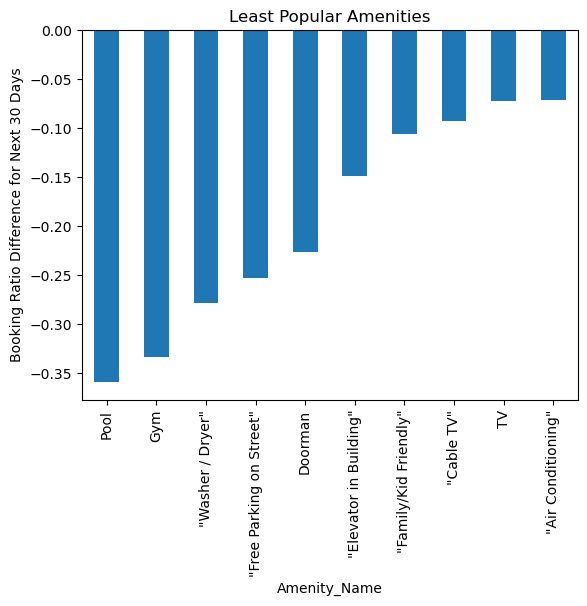

In [79]:
#Here I draw a bar chart to visualize which amenities are least prefered by guests.
amenities_importance['Booking Difference'].sort_values(ascending = True)[:10].plot(kind='bar', legend=None)
plt.title('Least Popular Amenities');
plt.ylabel('Booking Ratio Difference for Next 30 Days')
plt.show()

## For Question-2: Factors Attracting Guests
### The investigation aimed to determine the factors influencing guests' decisions when choosing a property to rent. This analysis involved exploring various features such as room type, property type, and amenities. Key findings include:

### Entire home/apartment listings tend to be more popular than private or shared rooms.
### Certain amenities like Washer/Dryer, Kitchen, and Pets Allowed positively influence booking rates, while amenities like Pool and Breakfast have less impact.
### The analysis also highlighted differences in booking ratios based on different room and property types

## Question-3

There are so many features in the dataset, that has effect on the price of the listing. In the third question I would like to train a model to estimate the price of a listing. So the question I would like to answer is: How can we estimate the price of a listing, what are the most influencial features of the dataset to estimate the price of a listing.

###  First I would like to know about the number of missing values in the features that are related to price.

In [80]:
print(df_lis['price'].isnull().sum())
print(df_lis['weekly_price'].isnull().sum())
print(df_lis['monthly_price'].isnull().sum())
print(df_lis['security_deposit'].isnull().sum())
print(df_lis['cleaning_fee'].isnull().sum())

0
2693
2697
2243
1107


### There are five different prices in the dataset, which are listed below.
- price
- weekly_price
- monthly_price
- security_deposit
- cleaning_fee

In the code cell above, I find the number of null values in each column. As can be seen, some of the listings do not have weekly or monthly price. So it is a better idea to model the "price" because of larger sample size.
I will not take into account the security deposit and cleaning fee.

In [81]:
#Below, I made a list of important features in my opinion for estimating the price of a listing and created
#a sub-dataframe of listings dataframe.

#In order to answer the first question, I made columns for amenities categorical value, I will use all amenities columns
#I created there.

features_of_interest = ['bathrooms', 'bedrooms', 'beds', 'latitude', 'longitude', 'square_feet', 'reviews_per_month',
        'booking_ratio_30', 'accommodates', 'guests_included', '"24-Hour Check-in"', '"Suitable for Events"',
       '"Pets live on this property"', 'Dog(s)', '"Smoking Allowed"',
       '"Other pet(s)"', 'Essentials', '"Wireless Internet"',
       '"Buzzer/Wireless Intercom"', 'TV', 'Gym', 'Washer', 'Doorman', 'Dryer',
       '"Hot Tub"', '"Air Conditioning"', '"Pets Allowed"', 'Pool',
       '"Hair Dryer"', '"Fire Extinguisher"', 'Breakfast', '"Washer / Dryer"',
       '"Laptop Friendly Workspace"', '"Free Parking on Premises"',
       '"Lock on Bedroom Door"', 'Cat(s)', 'Hangers', '"Family/Kid Friendly"',
       '"Carbon Monoxide Detector"', '"Safety Card"', 'Kitchen',
       '"Elevator in Building"', 'Internet', 'Shampoo', '"Smoke Detector"',
       '"Wheelchair Accessible"', 'Iron', '"First Aid Kit"',
       '"Indoor Fireplace"', '"Cable TV"', 'Heating', 'host_is_superhost', 'neighbourhood_group_cleansed',
        'property_type','room_type','bed_type','price','security_deposit',
        'cleaning_fee', 'extra_people', 'instant_bookable', 'cancellation_policy']

df_lis_ml = df_lis[features_of_interest]

In [82]:
#Now lets check the missing values in each columns and find a way to fill them.

df_lis_ml.isnull().sum()[df_lis_ml.isnull().sum()>0]

bathrooms                         14
bedrooms                          10
beds                               9
square_feet                     3529
reviews_per_month                756
neighbourhood_group_cleansed    3585
property_type                      3
security_deposit                2243
cleaning_fee                    1107
dtype: int64

### There are only 9 columns that have missing values. Here is the strategy that I have for filling each of the columns:
- Almost all of **square_feet** are missing. So I decided to drop that columns since I have columns like beds, bedrooms and bathrooms columns that can replace the square_feet.
- bathrooms, bedrooms and beds have very few missing values. reviews_per_month also has some missing values. Since all these columns are float, I will fill the missing values with the mean of that column.
- host_is_superhost and property_type are categorical columns so for filling the missing values (which are very few) I will use the mode.
- security_deposit and cleaning_fee have object data type. I will change this later but for now I want to fill the missing values. The missing values here most probably mean they are equal to zero, so I will fill them with zero.

In [83]:
#Here I drop the 'square_feet' column since there are many missing values and
#columns like beds, bedrooms and bathrooms columns that can replace the square_feet

df_lis_ml = df_lis_ml.drop(columns='square_feet')

In [84]:
#Below, I replace the missing values of 4 features (bathrooms, bedrooms, beds and reviews_per_month) with
#mean values of each feature in the dataset.

df_lis_ml['bathrooms'].fillna(df_lis_ml['bathrooms'].mean(), inplace=True)
df_lis_ml['bedrooms'].fillna(df_lis_ml['bedrooms'].mean(), inplace=True)
df_lis_ml['beds'].fillna(df_lis_ml['beds'].mean(), inplace=True)
df_lis_ml['reviews_per_month'].fillna(df_lis_ml['reviews_per_month'].mean(), inplace=True)

In [85]:
#Below, I replace the missing values of 2 features (host_is_superhost and property_type) with
#mode values (most common) of each feature in the dataset.

df_lis_ml['host_is_superhost'].fillna(df_lis_ml['host_is_superhost'].mode()[0], inplace=True)
df_lis_ml['property_type'].fillna(df_lis_ml['property_type'].mode()[0], inplace=True)

In [86]:
#Below, I replace the missing values of 2 features (security_deposit and cleaning_fee) with zeros.
#The missing values in these features most probably mean they are equal to zero

df_lis_ml['security_deposit'].fillna(0, inplace=True)
df_lis_ml['cleaning_fee'].fillna(0, inplace=True)

### Now I will check the datatypes, make necessary changes for the datatypes. Also I will have to make new columns for categorical columns.

In [87]:
df_lis_ml.dtypes

bathrooms                       float64
bedrooms                        float64
beds                            float64
latitude                        float64
longitude                       float64
reviews_per_month               float64
booking_ratio_30                float64
accommodates                      int64
guests_included                   int64
"24-Hour Check-in"                int64
"Suitable for Events"             int64
"Pets live on this property"      int64
Dog(s)                            int64
"Smoking Allowed"                 int64
"Other pet(s)"                    int64
Essentials                        int64
"Wireless Internet"               int64
"Buzzer/Wireless Intercom"        int64
TV                                int64
Gym                               int64
Washer                            int64
Doorman                           int64
Dryer                             int64
"Hot Tub"                         int64
"Air Conditioning"                int64


### The following columns have to change from object to float:
- price
- security_deposit
- cleaning_fee

In [88]:
#In the columns that have information about price, the $ signs and (comma) signs has to be removed. 

df_lis_ml['price'] = df_lis_ml['price'].str.replace('$', '')
df_lis_ml['security_deposit'] = df_lis_ml['security_deposit'].str.replace('$', '')
df_lis_ml['cleaning_fee'] = df_lis_ml['cleaning_fee'].str.replace('$', '')
df_lis_ml['extra_people'] = df_lis_ml['extra_people'].str.replace('$', '')

df_lis_ml['price'] = df_lis_ml['price'].str.replace(',', '')
df_lis_ml['security_deposit'] = df_lis_ml['security_deposit'].str.replace(',', '')
df_lis_ml['cleaning_fee'] = df_lis_ml['cleaning_fee'].str.replace(',', '')
df_lis_ml['extra_people'] = df_lis_ml['extra_people'].str.replace(',', '')

#Removing $ and , signs made 0 (zero) values NaN again. So I have to fillna with 0 again. 
df_lis_ml['security_deposit'].fillna(0, inplace=True)
df_lis_ml['cleaning_fee'].fillna(0, inplace=True)

C:\Users\msmoh\AppData\Local\Temp\ipykernel_33940\1107830173.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_lis_ml['price'] = df_lis_ml['price'].str.replace('$', '')
C:\Users\msmoh\AppData\Local\Temp\ipykernel_33940\1107830173.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_lis_ml['security_deposit'] = df_lis_ml['security_deposit'].str.replace('$', '')
C:\Users\msmoh\AppData\Local\Temp\ipykernel_33940\1107830173.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_lis_ml['cleaning_fee'] = df_lis_ml['clea

In [89]:
#Changing data type from string to float.
df_lis_ml['price'] = df_lis_ml['price'].astype(float)
df_lis_ml['security_deposit'] = df_lis_ml['security_deposit'].astype(float)
df_lis_ml['cleaning_fee'] = df_lis_ml['cleaning_fee'].astype(float)
df_lis_ml['extra_people'] = df_lis_ml['extra_people'].astype(float)

In [90]:
#creating a new dataframe which is a subset of categorical columns of out df_lis_ml dataframe
cat_cols = df_lis_ml.select_dtypes(include=['object'])

In [91]:
cat_cols.head()

,host_is_superhost,property_type,room_type,bed_type,instant_bookable,cancellation_policy
0,f,House,Entire home/apt,Real Bed,f,moderate
1,f,Apartment,Private room,Real Bed,t,moderate
2,t,Apartment,Private room,Real Bed,f,moderate
3,f,House,Private room,Real Bed,f,moderate
4,t,House,Private room,Real Bed,f,flexible


In [92]:
# Making new columns from categorical variables in order to use these features in ML regression algoritm.
for col in cat_cols:
    try:
        df_lis_ml = pd.concat([df_lis_ml.drop(col, axis=1), pd.get_dummies(df_lis_ml[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)
    except:
        continue

### Since I made the data ready, I will try Linear Regression to estimate price depending on features I selected.

In [93]:
#Creating the X (feautures) and y (the variable to be modelled) dataframes
y = df_lis_ml['price']
X = df_lis_ml.drop(columns='price')

In [94]:
#Splitting the new dataframes into train and test dataframes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [95]:
from sklearn.impute import SimpleImputer

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Fit the linear regression model
lm_model = LinearRegression()
lm_model.fit(X_train_imputed, y_train)

# Make predictions with the test set
y_test_preds = lm_model.predict(X_test_imputed)

# Score the success of the model
test_score = r2_score(y_test, y_test_preds)
print(test_score)


0.22596990093422287


C:\Users\msmoh\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['neighbourhood_group_cleansed']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\msmoh\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['neighbourhood_group_cleansed']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


## The r-squared value of my model is 0.225 which is not too high.

I want to investigate about the coefficients of my model. Below function is taken from one of the Udacity jupyter notebook examples. I used this code to see coefficients of my model.

In [97]:
import numpy as np

def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    # Add an intercept term
    intercept = pd.Series(['Intercept'], index=['Intercept'])
    coefficients = np.insert(coefficients, 0, lm_model.intercept_)
    
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = coefficients
    coefs_df['abs_coefs'] = np.abs(coefficients)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

# Use the function
coef_df = coef_weights(lm_model.coef_, X_train)


### Below is the list features that are the most influential coefficients. 

In [98]:
coef_df.head(15)

,est_int,coefs,abs_coefs
0,bathrooms,-4815.190847,4815.190847
4,longitude,524.877878,524.877878
5,reviews_per_month,243.387310,243.387310
31,"""Laptop Friendly Workspace""",138.339601,138.339601
57,property_type_Camper/RV,-115.087907,115.087907
76,cancellation_policy_super_strict_30,87.391213,87.391213
68,room_type_Shared room,-64.174186,64.174186
67,room_type_Private room,-62.333300,62.333300
22,Dryer,53.066911,53.066911
15,Essentials,-46.644780,46.644780


### In order to increase r-squared value I will use SelectKBest.
Below I write a function that tests different "k" numbers and compare r-squared for each k value.

In [99]:
def find_optimal_number_of_selectors(X, y, k_samples, plot=True):
    '''
    INPUT:
    X dataframe that contains the features.
    y dataframe that contains the variable to be predicted.
    k_samples is a list of k values that will be tested.
    
    OUTPUT:
    A dictionary that contains values of tested k-values as keys and r-squared values for each key.
    The k-value that has the highest r-squared.

    '''   
    result_r_squareds = []
    results = {}
    for kes in k_samples:
        selector = SelectKBest(score_func=f_regression, k=kes)
        selector.fit_transform(X, y)
        selected_cols = selector.get_support(indices=True)
        features_new_X = X.iloc[:,selected_cols]
        
        X_train, X_test, y_train, y_test = train_test_split(features_new_X, y, test_size = 0.2, random_state=42)
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        result_r_squareds.append(r2_score(y_test, y_test_preds))
        results[str(kes)] = r2_score(y_test, y_test_preds)
    
    if plot:
        plt.plot(k_samples, result_r_squareds, label="r-squared", alpha=0.5)
        plt.xlabel("Different k_values")
        plt.ylabel("R_Squared_Values")
        plt.legend(loc=1)
        plt.show()
    
    best_k = max(results, key=results.get)
    
    return results, best_k

In [100]:
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression

def find_optimal_number_of_selectors(X, y, k_samples, plot=True):
    results = {}
    best_k = None
    best_r2 = -float('inf')
    
    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)
    
    for k in k_samples:
        selector = SelectKBest(score_func=f_regression, k=k)
        selector.fit_transform(X_imputed, y)
        selected_cols = selector.get_support(indices=True)
        features_new_X = X_imputed[:, selected_cols]
        
        # Train a model and evaluate its performance
        model = LinearRegression()
        model.fit(features_new_X, y)
        y_pred = model.predict(features_new_X)
        r2 = r2_score(y, y_pred)
        


## For Question-3: Estimating Listing Price
### The objective was to build a model to estimate the price of a listing based on various features. The code prepared the data by handling missing values and converting categorical variables into numerical form. A Linear Regression model was trained and evaluated, achieving an R-squared value of 0.225. Additionally, feature selection techniques were applied to identify the most influential features on price estimation.

### Question-4

In the dataset we have latitude and longitude that gives information about the location of the listing. I would like to investigate effect of listings' proximity to Seattle Downtown. Does it increase the price or decrease the price to be close to downtown. And how much does it effect the price? This is my final question to answer.

### Below I write a function that calculate the distance from downtown. According to Google Maps the coordinates of Seattle downtown are [47.605151, -122.334379] This is the coordinate that I will calculate the distance of every listing.

In [101]:
def distance_from_downtown(lat, lon, downtown=[47.605151, -122.334379]):
    '''
    INPUT:
    lat is the latitude of the point that I will calculate distance.
    lon is the longitude of the point that I will calculate distance.
    downtown is the coordinate of Seattle Downtown according to Google Maps. Downtown variable can be different, if the
    distance is expected to be calculated from a different point.
    
    OUTPUT:
    Distance between the point and the downtown.
    '''   
    R = 6373.0
    lat1 = math.radians(downtown[0])
    lon1 = math.radians(downtown[1])
    lat2 = math.radians(lat)
    lon2 = math.radians(lon)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    return distance

In [102]:
#Below I make a for look to calculate the distance of each listing from downtown.
#I create a new variable called 'distance_from_downtown' which has the information of distance of listing from downtown. 
for i in range(len(df_lis_ml)):
    df_lis_ml.loc[ i , 'distance_from_downtown'] = distance_from_downtown(df_lis_ml.loc[ i ,'latitude'] , df_lis_ml.loc[ i ,'longitude'])

In [103]:
#Since we added a distance variable, we do not need 'latitude', 'longitude' columns.
df_lis_ml.drop(columns=['latitude', 'longitude'], inplace=True)

### Lets make another regression model with distance from downtown variable.

In [104]:
#Creating the X (feautures) and y (the variable to be modelled) dataframes
y = df_lis_ml['price']
X = df_lis_ml.drop(columns='price')

In [105]:
#Splitting the new dataframes into train and test dataframes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Fill missing values with mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Applying the linear regression, fitting the model, making predictions with the test set
lm_model = LinearRegression()
lm_model.fit(X_train_scaled, y_train)
y_test_preds = lm_model.predict(X_test_scaled)

# Scoring the success of the model
test_score = r2_score(y_test, y_test_preds)
print(test_score)


0.2213709164084403


C:\Users\msmoh\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['neighbourhood_group_cleansed']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\msmoh\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['neighbourhood_group_cleansed']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [107]:
#Previously I had written a function above to see coefficients of my regression model.
#The name of the function was "coef_weights"

#I use the function again to find the coefficients of the new model.
coef_df = coef_weights(lm_model.coef_, X_train)

In [108]:
#I print the coefficient of 'distance_from_downtown' variable
coef_df[coef_df['est_int'] == 'distance_from_downtown']

,est_int,coefs,abs_coefs
75,distance_from_downtown,3.639084,3.639084


## For Question-4: Proximity to Downtown
### The analysis investigated the effect of a listing's proximity to Seattle Downtown on its price. By calculating the distance of each listing from downtown, the code revealed that as the distance increases, the price of the listing decreases. For every kilometer farther from downtown, the price decreases by approximately 3 USD.

# Conclusion :- 
### Overall, the analysis provided insights into the most common amenities, factors influencing guest preferences, methods for estimating listing prices, and the impact of location proximity on pricing